### RDM Beta line plots

In [1]:
# Libraries
import sys, os
import mne # Python package for processing and analyzing electrophysiological data
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
# ~~~~~~~~~~~~~~ Parameters
group = 'adult'
modality = 'visual' # 'visual' or 'audio'

# Print out each parameter
print(f"{group}: {modality} RDM beta will be visualized")
# ~~~~~~~~~~~~~~ Parameters ~~~~~~~~~~~~~~


# ~~~~~~~~~~~~~~ Set the working directory
path = f"/u/kazma/MINT/data/{group}/processed/{modality}"
sub_folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
sub_folders_sorted = sorted(sub_folders, key=lambda x: int(re.search(r'\d+', x).group())) # Sort the folders based on the numeric part after "sub-"
# ~~~~~~~~~~~~~~ Set the working directory ~~~~~~~~~~~~~~


adult: visual RDM beta will be visualized


In [3]:
### SUB_LOOP
subject = sub_folders_sorted[1]

# each subject's file name
sub_filename = os.path.join(path, subject, 'rdm_beta.pkl')

# Open the file and load data
with open(sub_filename, 'rb') as file:
    data = pickle.load(file)
# data = pd.DataFrame(data)
df = data.iloc[1:, :]

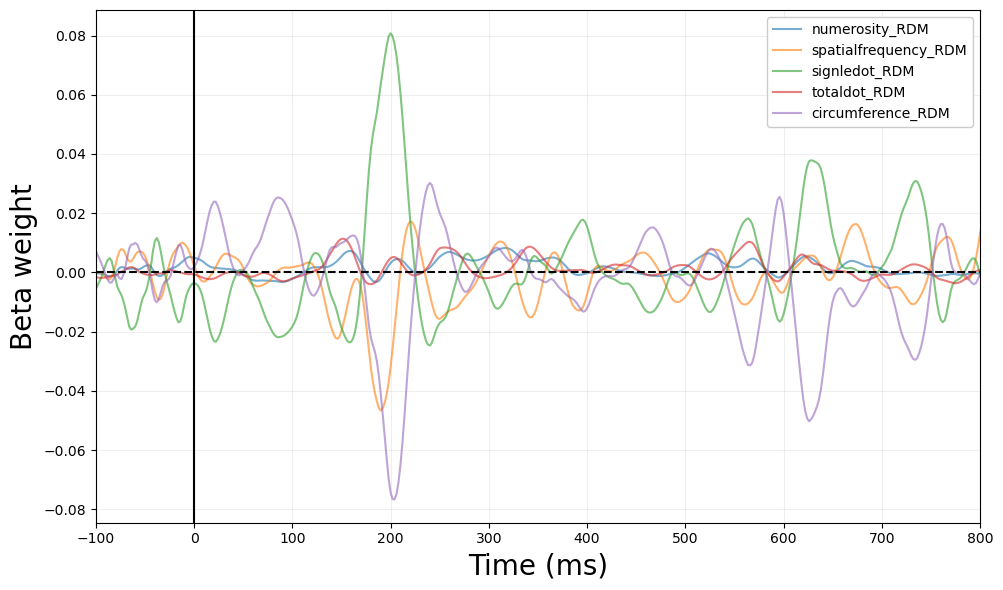

In [4]:
# Plot each column
x = np.linspace(-100,1000,551)

plt.figure(figsize=(10, 6))
for column in df.index:
    plt.plot(x, df.loc[column], label=column, alpha=0.6)

# plt.plot(x, average, label='average', alpha=1, color='darkmagenta', linewidth=2)

# Customize the plot
plt.xlabel('Time (ms)', size=20)
plt.ylabel('Beta weight', size=20)
plt.legend(loc='upper right', fontsize=10, framealpha=1)
plt.grid(alpha=0.2)
plt.axvline(0, color='black')
plt.axhline(0,color='black', linestyle='--')
plt.tight_layout()
plt.xlim(-100,800)

# save the image
plt.savefig(f"{path}/{subject}/rdm_beta.png", dpi=300, bbox_inches='tight')

plt.show()